In [201]:
#imports necessary for proper data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
plt.style.use("ggplot")

### Preparing Data

In [202]:
#reading in csv file
data = pd.read_csv('Amazon Customer Behavior Survey.csv')
data.head (10)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy
6,2023/06/04 6:31:41 PM GMT+5:30,22,Female,Less than once a month,Clothing and Fashion,No,Rarely,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Sometimes,3,3,Wide product selection,Shipping speed and reliability
7,2023/06/04 7:13:12 PM GMT+5:30,21,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Sometimes,3,Sometimes,1,3,Competitive prices,Shipping speed and reliability
8,2023/06/04 7:23:21 PM GMT+5:30,20,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Sometimes,Few times a month,Keyword,First page,1,...,Often,No,Moderately,Yes,2,Yes,2,2,Wide product selection,Reducing packaging waste
9,2023/06/04 7:33:12 PM GMT+5:30,23,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Yes,3,4,Wide product selection,Product quality and accuracy


In [203]:
#statistical description of the data for numerical values in set
data.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [204]:
#rows and colums within data
data.shape

(602, 23)

In [205]:
#types for each column in the dataset
data.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [206]:
#column names within the dataset
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [207]:
#understanding overall structure of the dataset + null value distribution
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [208]:
#dropping null values within the dataset
data = data.dropna()

#dropping unecessary columns 
data = data [['age', 'Gender', 'Purchase_Frequency',
       'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Review_Left',
       'Personalized_Recommendation_Frequency ',
       'Rating_Accuracy ', 'Shopping_Satisfaction']].copy()

#renaming data fields for better readability
data = data.rename (columns = {
    'age' : 'Age'
}).copy()

In [209]:
#checking for duplicated in the data and dropping appropriately 
data.duplicated().sum() #returned 1

#dropping duplicated rows
data = data.drop_duplicates()

data

,Age,Gender,Purchase_Frequency,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Review_Left,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
0,23,Female,Few times a month,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Yes,2,1,1
1,23,Female,Once a month,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,No,2,3,2
2,24,Prefer not to say,Few times a month,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,No,4,3,3
3,24,Female,Once a month,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Yes,3,3,4
4,22,Female,Less than once a month,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,No,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,25,Female,Once a week,Sometimes,Multiple times a day,categories,Multiple pages,4,Maybe,Sometimes,Found a better price elsewhere,Yes,3,3,3
597,23,Female,Once a week,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,Sometimes,Found a better price elsewhere,Yes,3,3,4
599,23,Female,Once a month,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,Sometimes,High shipping costs,Yes,3,2,3
600,23,Female,Few times a month,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,others,No,2,2,2


### Univariate Analysis

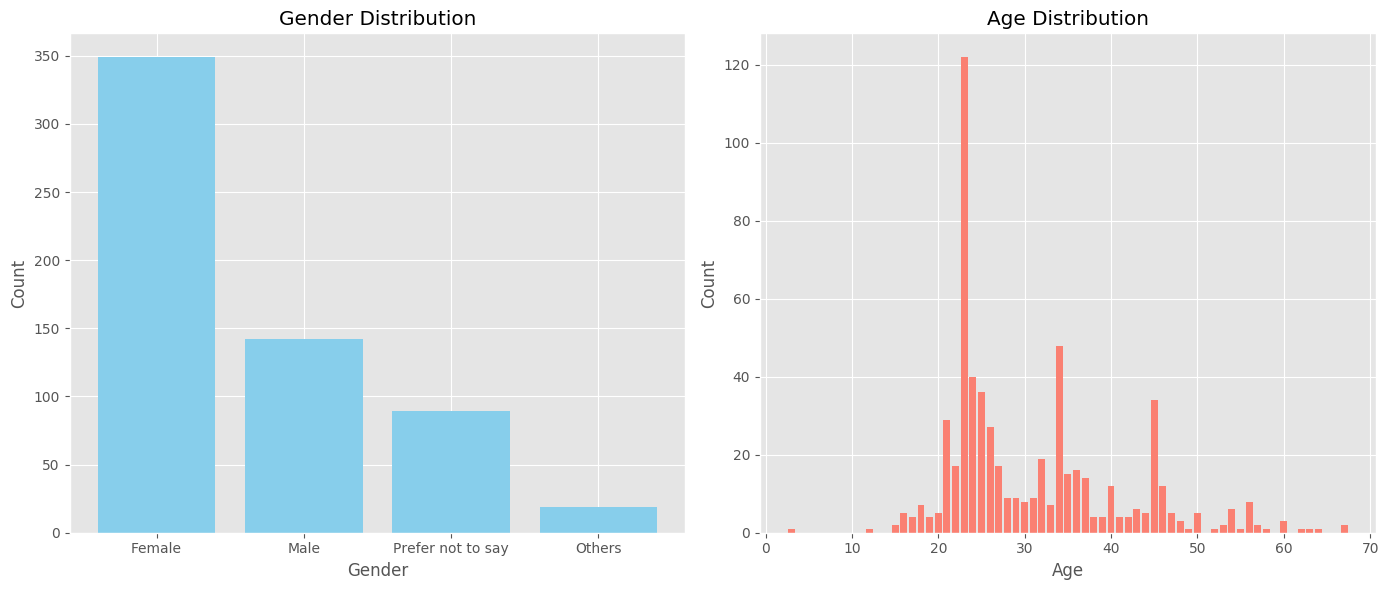

In [210]:
gender_counts = data['Gender'].value_counts()
purchase_category_counts = data['Age'].value_counts()

# Create subplots to visualize the comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Gender distribution
ax[0].bar(gender_counts.index, gender_counts.values, color='skyblue')
ax[0].set_title('Gender Distribution')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

# Plotting Purchase Categories distribution
ax[1].bar(purchase_category_counts.index, purchase_category_counts.values, color='salmon')
ax[1].set_title('Age Distribution')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

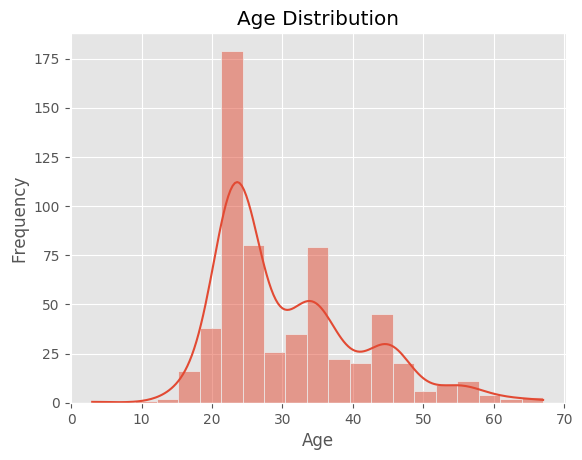

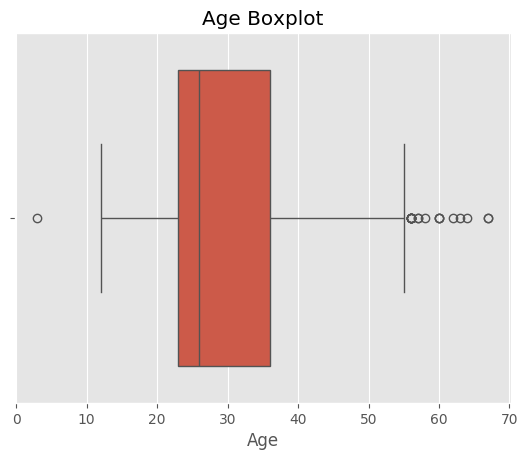

In [212]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(x=data['Age'])
plt.title('Age Boxplot')
plt.show()

<Axes: title={'center': 'Shopping Satisfaction Distribution'}, ylabel='Frequency'>

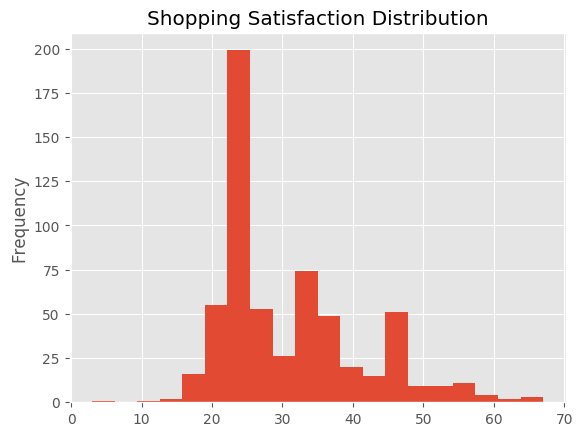

In [174]:
#Univariate Analysis
data['Age'].plot (kind = 'hist', bins = 20, title = 'Shopping Satisfaction Distribution')

### Multivariate Analysis

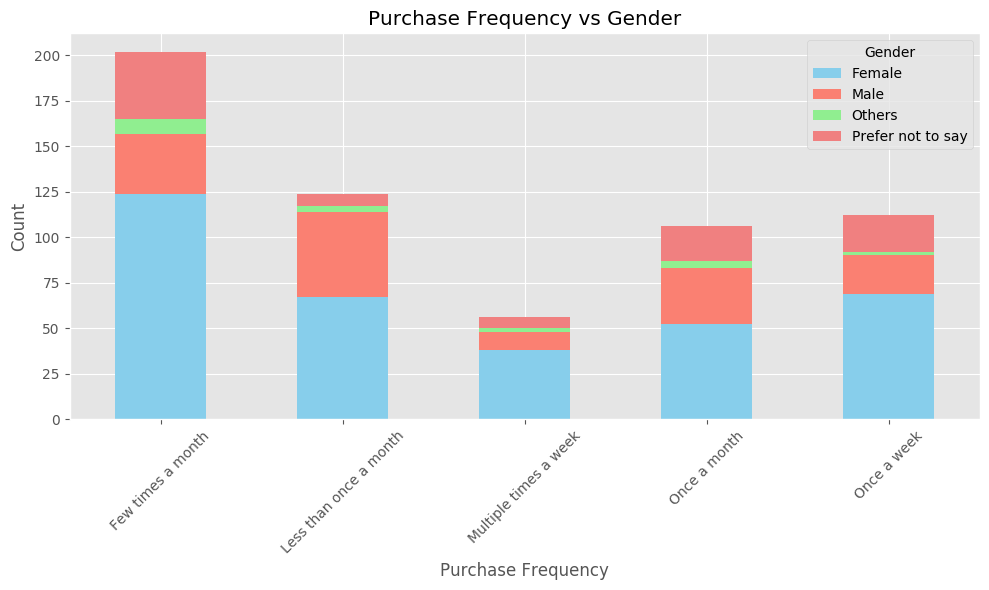

In [172]:
# Example mapping of Purchase_Frequency to numerical values (customize as needed)
frequency_mapping = {
    'Once a month': 1,
    'Few times a month': 2,
    'Less than once a month': 3,
}

# Apply this mapping to the 'Purchase_Frequency' column
purchase_frequency_counts = data['Purchase_Frequency'].value_counts()
gender_counts = data['Gender'].value_counts()


# Count occurrences of each combination of 'Purchase_Frequency' and 'Gender'
purchase_gender_counts = data.groupby(['Purchase_Frequency', 'Gender']).size().unstack()

# Plot the stacked bar chart
purchase_gender_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'yellow'])

# Add labels and title
plt.title('Purchase Frequency vs Gender')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()


### Asking Questions

### ML Model